In [ ]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
hotel_raw_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/hotel_bookings.csv')

In [ ]:
# checking for null values 

null_values = pd.DataFrame({'Null Values' : hotel_raw_df.isna().sum(), 'Percentage Null Values' : (hotel_raw_df.isna().sum()) / (hotel_raw_df.shape[0]) * (100)})
null_values

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


Adults, babies, and children can't be zero at the same time, so dropping the rows having all these zero at the same time because will mean that the hotel/room was not even booked.

In [ ]:
filter = (hotel_raw_df.children == 0) & (hotel_raw_df.adults == 0) & (hotel_raw_df.babies == 0)
hotel_raw_df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

This shows there is the total of 177 countries from where the bookings are made to these 2 hotels. We can identify the countries with the highest number of bookings using the `value_counts` method.

In [ ]:
top_countries_with_codes = hotel_raw_df.country.value_counts().head(10)
top_countries_with_codes

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

### How much do guests pay for a room per night?

Let's check out the price paid(in one night) by the guests who are staying in these hotels. Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, We will assume that all prices are in EUR. We will only be counting adults and children as paying guests only, not babies.

In [ ]:
resort_hotel = hotel_df.loc[(hotel_df["hotel"] == "Resort Hotel") & (hotel_df["is_canceled"] == 0)]
city_hotel = hotel_df.loc[(hotel_df["hotel"] == "City Hotel") & (hotel_df["is_canceled"] == 0)]

# только взрослые и дети будут считаться платными гостями, а не младенцы
resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

# поскольку набор данных содержит бесконечные значения, нам, возможно, придется удалить эти бесконечные значения, 
# чтобы вычислить среднее или максимальное значение. в этой ситуации бесконечные значения заменяются нулем.
import numpy as np
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])



print("""Из всех неотмененных бронирований, по всем типам номеров и различному питанию, средние цены составляют:
курортный отель: {:.2f} € в сутки на человека
городской отель: {:.2f} € в сутки на человека"""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

Из всех неотмененных бронирований, по всем типам номеров и различному питанию, средние цены составляют:
курортный отель: nan € в сутки на человека
городской отель: nan € в сутки на человека


In [ ]:
resort_hotel = hotel_df.loc[(hotel_df["hotel"] == "Resort Hotel") & (hotel_df["is_canceled"] == 0)]
city_hotel = hotel_df.loc[(hotel_df["hotel"] == "City Hotel") & (hotel_df["is_canceled"] == 0)]

In [ ]:
# только взрослые и дети будут считаться платными гостями, а не младенцы

resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

<ipython-input-27-d523f5795614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])


As the dataset contains infinite values we might have to remove those infinite values in order to calculate the mean or max. In this situation I am replacing infinite values with 0.

In [ ]:
import numpy as np
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)

In [ ]:
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])

<ipython-input-29-1d77bf61bd9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])


In [ ]:
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

Let's print out the mean values from both the data frames.

In [ ]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.23 € per night and person.


In [ ]:
# normalize price per night (adr):

hotel_df["adr_pp"] = hotel_df["adr"] / (hotel_df["adults"] + hotel_df["children"])
hotel_df_guests = hotel_df.loc[hotel_df["is_canceled"] == 0]
hotel_df_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17,52.200000


In [ ]:
# only actual gusts

room_prices = hotel_df_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices

,hotel,reserved_room_type,adr_pp
80541,City Hotel,A,68.850
90111,City Hotel,A,55.675
90112,City Hotel,A,49.830
90114,City Hotel,A,64.000
90115,City Hotel,A,64.500
...,...,...,...
26937,Resort Hotel,H,80.500
14570,Resort Hotel,L,82.000
15855,Resort Hotel,L,86.000
911,Resort Hotel,L,100.000


Let's plot a graph to visualize the data and understand it in a better way. This time we will use boxplot.

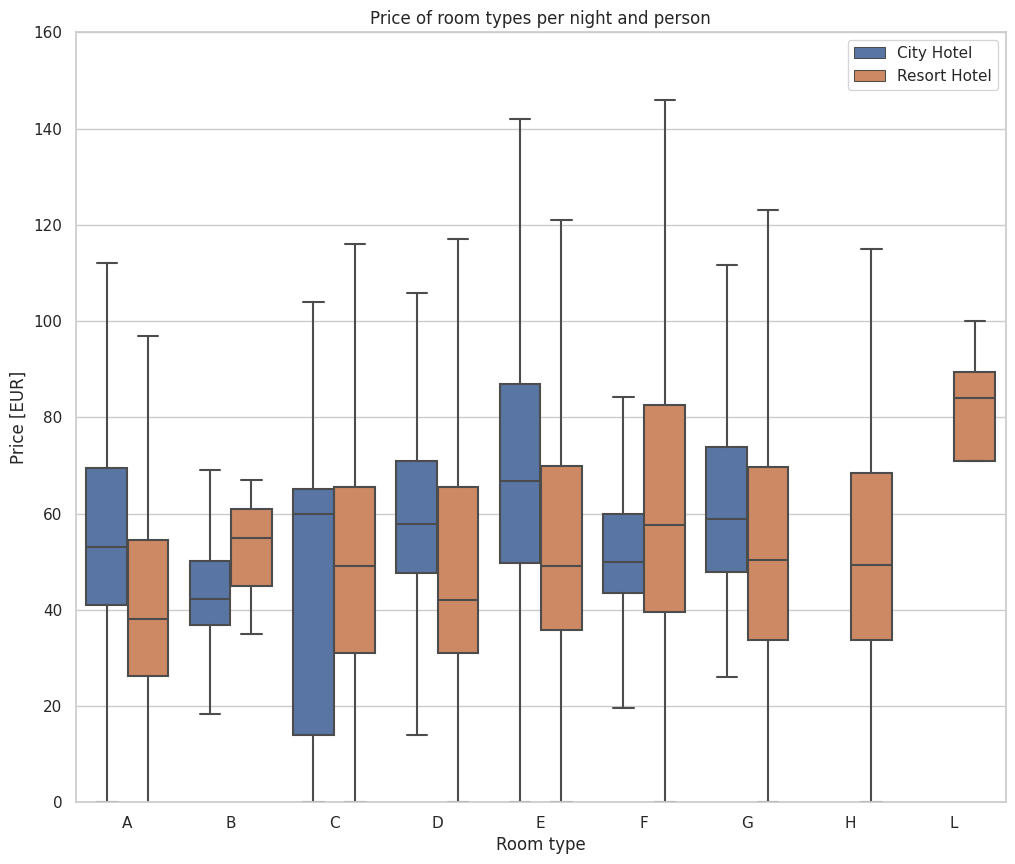

In [ ]:
# boxplot:
plt.figure(figsize=(12, 10))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person")
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

### How does the price per night vary over the year?

To keep it simple, I'm using the average price per night and person, regardless of the room type and meal.

In [ ]:
# grab data:

room_prices_monthly = hotel_df_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_prices_monthly

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
110759,City Hotel,April,45.00
110760,City Hotel,April,65.25
...,...,...,...
43519,City Hotel,September,31.00
43518,City Hotel,September,28.00
43517,City Hotel,September,38.25
43563,City Hotel,September,45.00


In [ ]:
# order by month:

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

<ipython-input-59-b24d5bdaa76f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly,


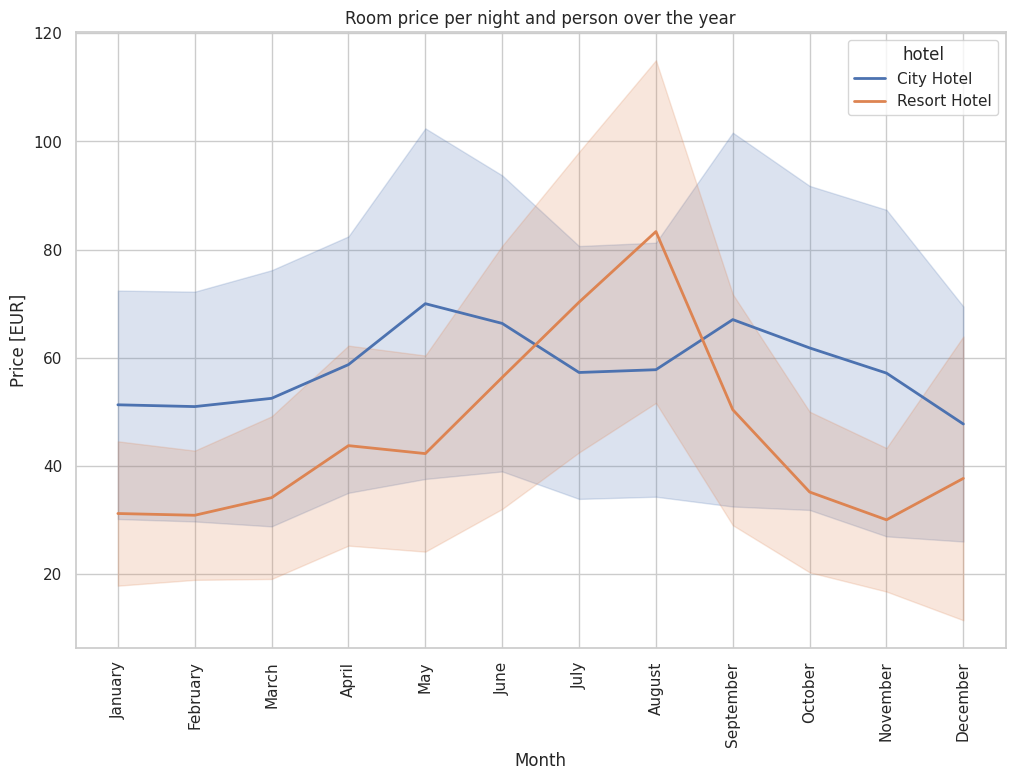

In [ ]:
# barplot with standard deviation:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room price per night and person over the year")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]")
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

Let's ask some more specific questions and try to answer them using data frame operations and visualizations.

#### Q1: How many guests are there who have repeatedly canceled the bookings?

We will plot this information using a countplot by seaborn

In [ ]:
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace(0,'No')
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace(1,'Yes')

In [ ]:
hotel_df['is_repeated_guest']

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_repeated_guest, Length: 119390, dtype: object

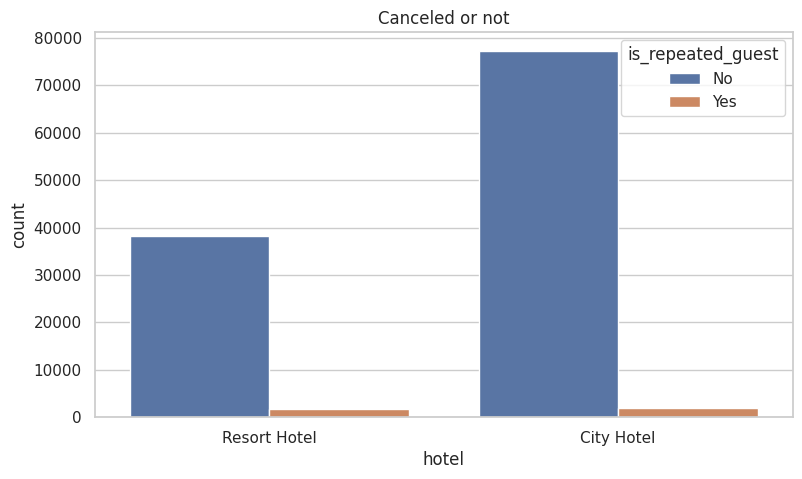

In [ ]:
sns.set(style = "whitegrid")
plt.title("Canceled or not")
canceled = sns.countplot(x = hotel_df.hotel, hue = 'is_repeated_guest', data = hotel_df)

There is no surprise that repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

#### Q2: Let's check in which hotel people like to stay and spend more time.

We will check this on weekdays and weekends separately, because we might see a skew distribution here. First let's plot the boxplot market segment wise and we will first check for the week nights stay. The market segment will tell us what type of stay is it.

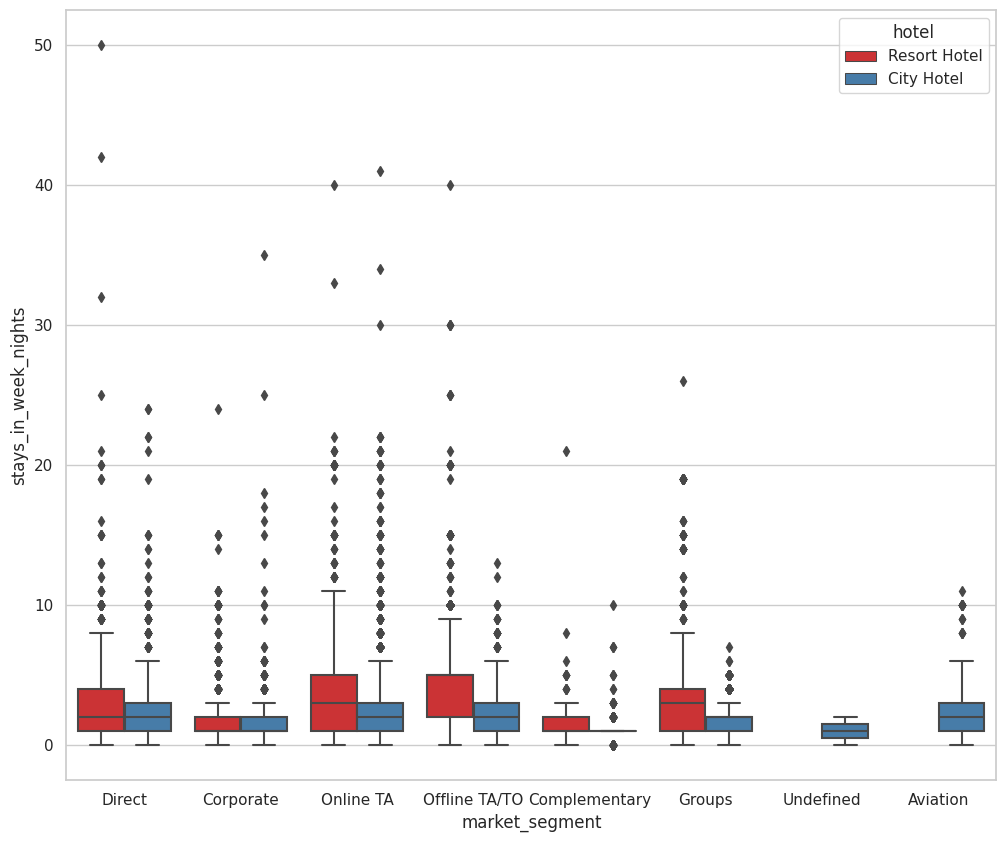

In [ ]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel", palette = 'Set1');

Now let's plot the boxplot market segment wise and we will now check for the weekends stay.

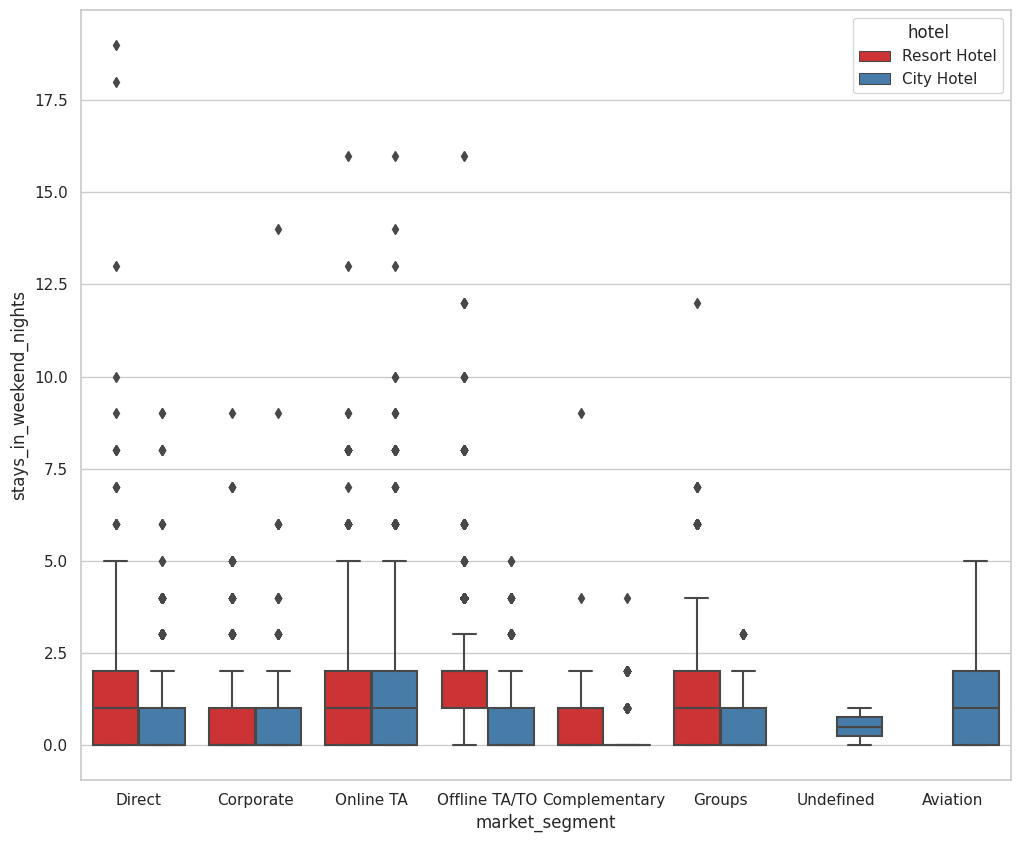

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel", palette = 'Set1');

It can be seen that most of the groups are normally distributed, some of them have high skewness. Looking at the distribution, it can be concluded that most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment. If the total time feature was created by summing up the weekend and week nights, this would be clearer, but it can be clearly seen when looking at the two visualizations together.

As it turns out, customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average. Apart from that, the weekends and weekdays averages are roughly equal. Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

It is obvious that when people go to resort hotels, they prefer to stay more.

Let's plot the countplot by market segment distribution.

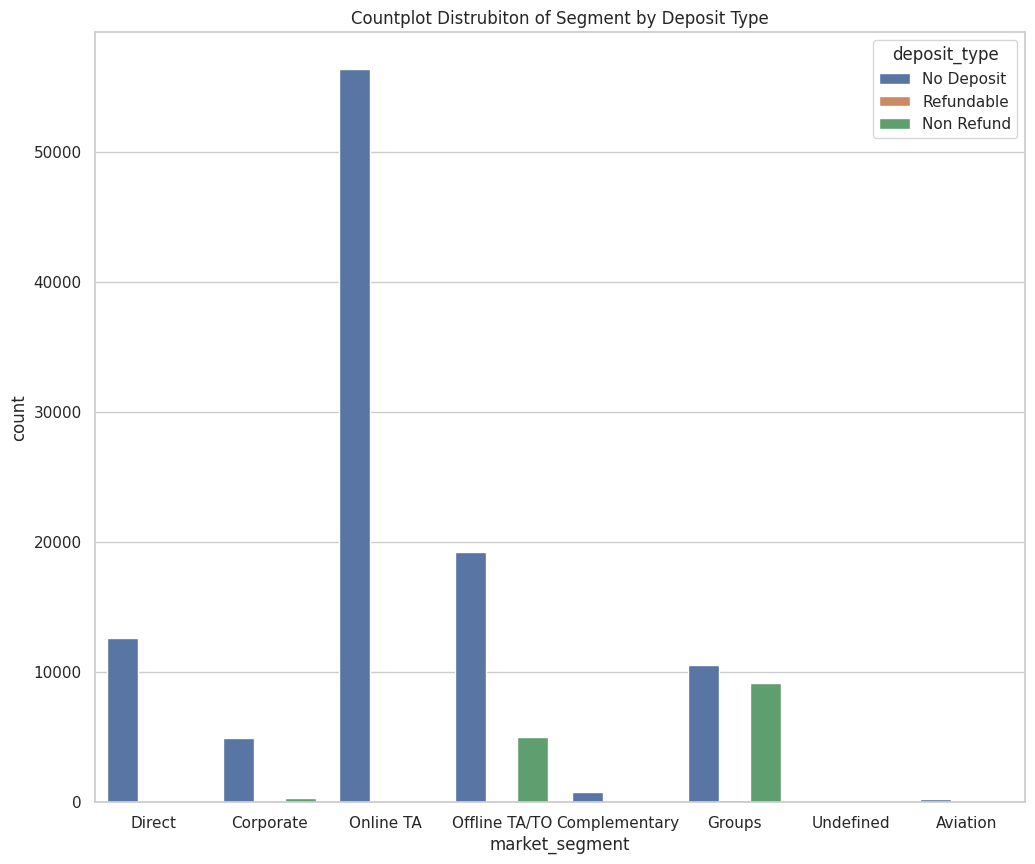

In [ ]:
plt.figure(figsize = (12,10))
sns.set(style = "whitegrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type")
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = hotel_df)

#### Q3: What is the effects of deposit on cancellations by segments.

Let's check the countplot distribution by cancellation in those market segments.

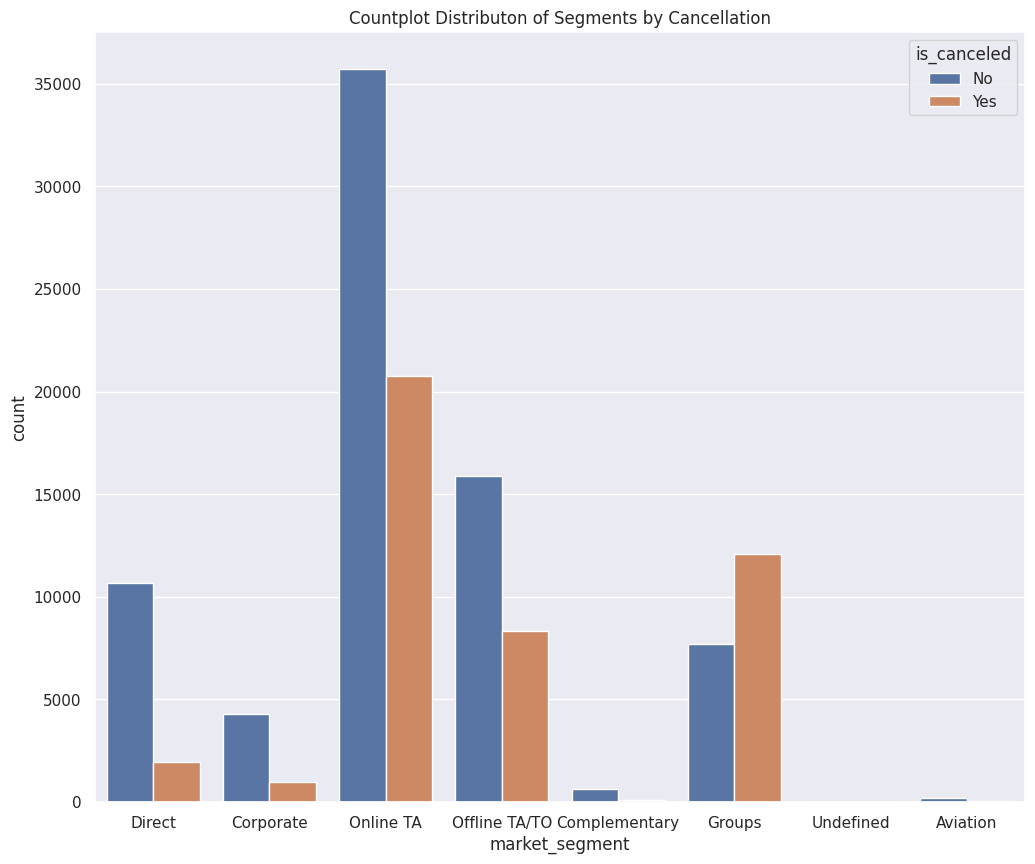

In [ ]:
plt.figure(figsize = (12,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation")
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = hotel_df)

When looking at Offline TA/TO and Groups, the only circumstances in which the payment was received were those in which the groups arrived. Applying a deposit for a sizable number of guests who will occupy a sizable portion of the hotel's capacity is quite logical.

I first assumed that the market segments where a deposit is applied would have a lower cancellation rate than the segments where no deposit is applied. However, it appears that this is not the case when we look at the cancellations according to the segments in the other representation.

- The cancellation rate for groups is greater than 50%.
- The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.
- Direct segments have a lower rate of cancellation.

It is interesting that despite applying a deposit, the cancellation rate in these parts is significant. This scenario might be somewhat explained by the fact that cancellations are made jointly like bookings.

Online reservation cancellation rates are typical for a dynamic environment with significant circulation.

The fact that the cancellation rate in the direct segment is so low is another issue that caught my attention. In the event when people are speaking one-on-one, I believe that a mutually trusting relationship has been built at this time. I won't linger too much on this, but I believe there is a psychological element at play.

#### Q4: What is the relationship of lead time with cancellation.

We will plot a density curve of lead time by cancellation.

In [ ]:
hotel_df['is_canceled'] = hotel_df['is_canceled'].replace(0,'No')
hotel_df['is_canceled'] = hotel_df['is_canceled'].replace(1,'Yes')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


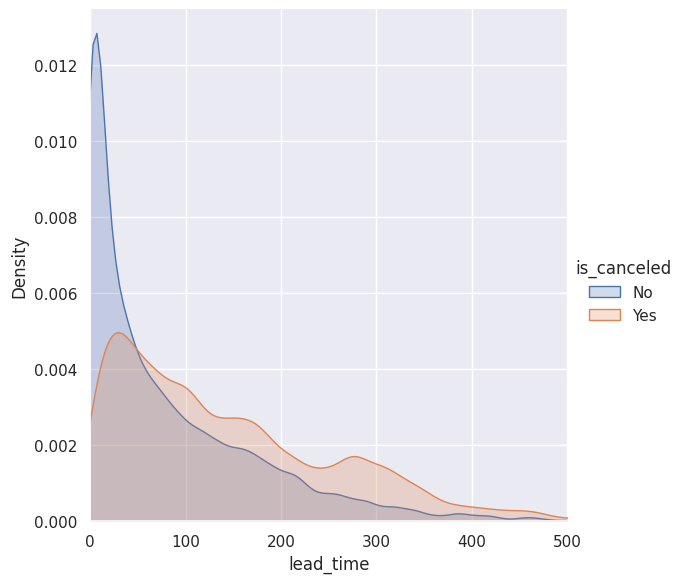

In [ ]:
(sns.FacetGrid(hotel_df, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

#### Q5: What is the monthly customers each hotel is receiving?

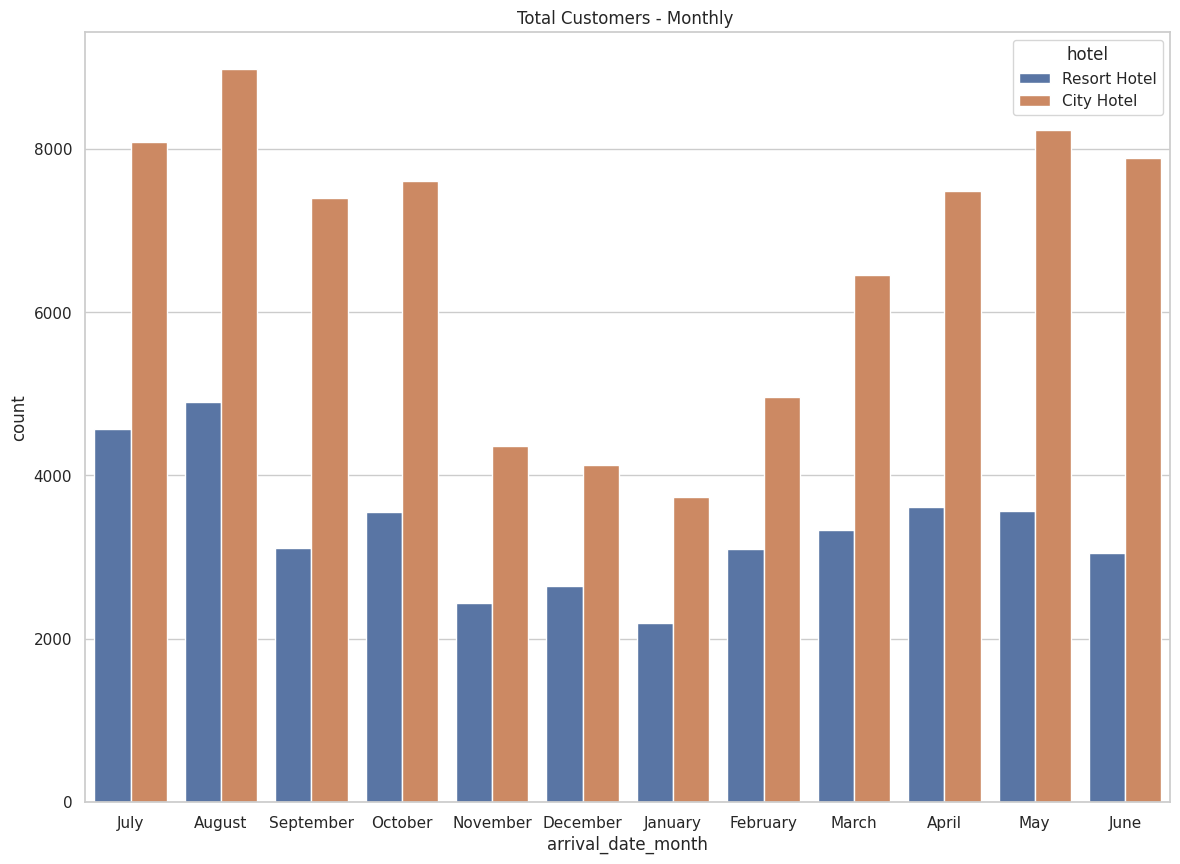

In [ ]:
plt.figure(figsize =(14,10))
sns.set(style="whitegrid")
plt.title("Total Customers - Monthly ")
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = hotel_df)

The first graph shows that city hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

#### Q6: Which are the most busy month?

In [ ]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

In [ ]:
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [ ]:
# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

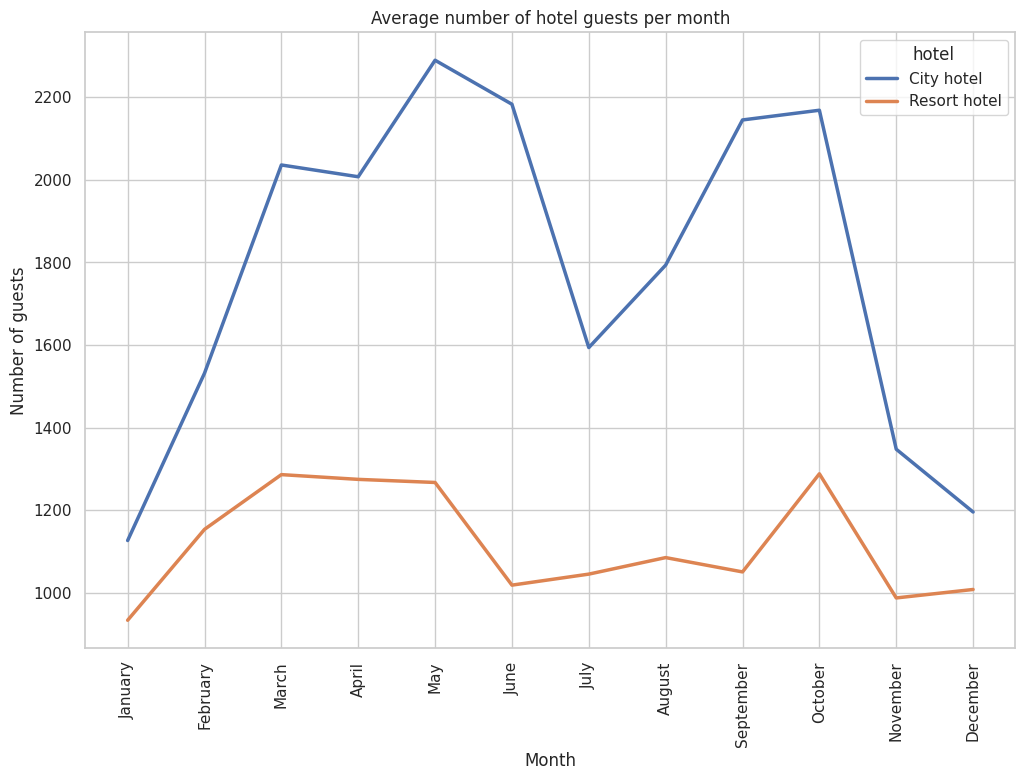

In [ ]:
#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.ylabel("Number of guests")
plt.show()

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel.
The winter season draws the fewest visitors to both hotels.

#### Q7- How many bookings were canceled?

In [ ]:
# absolute cancelations:
total_cancelations = hotel_raw_df["is_canceled"].sum()
resort_cancelations = hotel_raw_df.loc[hotel_raw_df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelations = hotel_raw_df.loc[hotel_raw_df["hotel"] == "City Hotel"]["is_canceled"].sum()

In [ ]:
# as percent:
rel_cancel = total_cancelations / hotel_df.shape[0] * 100
rh_rel_cancel = resort_cancelations / hotel_raw_df.loc[hotel_raw_df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_cancelations / hotel_raw_df.loc[hotel_raw_df["hotel"] == "City Hotel"].shape[0] * 100

In [ ]:
print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {city_cancelations:,} ({ch_rel_cancel:.0f} %)")

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

- It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.

- From all non-canceled bookings, across all room types and meals, the average prices are:
        - Resort hotel: 47.56 € per night and person.
        - City hotel: 59.29 € per night and person.
        
- The prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

- Repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

- Most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.

- Customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average.

- The weekends and weekdays averages are roughly equal.

- Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

- The cancellation rate for groups is greater than 50%.
- The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.
- Direct segments have a lower rate of cancellation.

- When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

- City hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

- The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

- From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.